In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [14]:
dns_180 = np.loadtxt("../01_DATA_PREPARATION/DNS/Re180.prof.txt",skiprows=27,usecols=(1,2))
dns_550 = np.loadtxt("../01_DATA_PREPARATION/DNS/Re550.prof.txt",skiprows=27,usecols=(1,2))
dns_950 = np.loadtxt("../01_DATA_PREPARATION/DNS/Re950.prof.txt",skiprows=27,usecols=(1,2))
dns_2000 = np.loadtxt("../01_DATA_PREPARATION/DNS/Re2000.prof.txt",skiprows=27,usecols=(1,2))
dns_4200 = np.loadtxt("../01_DATA_PREPARATION/DNS/Re4200.prof.txt",skiprows=27,usecols=(1,2))

In [69]:
les_1000 = pd.read_csv("./1000/new_scene_00.csv", usecols=["u_plus","y_plus","VELOC:0","Points:0","Points:1","Points:2"])

In [50]:
les_180 = pd.read_csv("./Experiments/exp_1/test_data/newscene_100.csv")

In [52]:
les_550 = pd.read_csv("./550/new_scene_20.csv")

In [60]:
dns_list = [dns_180,dns_550,dns_950,dns_2000,dns_4200]
names_list = ["180","550","950","2000","4200"]

In [62]:
def plot_low(data_list, names_list=None):
    plt.figure(figsize=(10,8))
    for idx, data in enumerate(data_list):
        means_train = pd.DataFrame(data)
        if names_list:
            label=names_list[idx]
        else:
            label=DNS
        means_train.columns = ["y_plus","u_plus"]
        grid =len(data)
        plt.plot(means_train['y_plus'],means_train['u_plus'],label=label,linewidth=2,)
    plt.xscale("log")
    plt.xlim(1,1000)
    plt.xticks((1,10,100,1000,10000))
    plt.legend()

In [76]:
def get_u_y_plus(data_file, mu):
    x = data_file["Points:0"].values
    y = data_file["Points:1"].values
    z = data_file["Points:2"].values
    u = data_file["VELOC:0"].values
    
    xlin = np.unique(x);
    ylin = np.unique(y);
    zlin = np.unique(z);
    x3d, y3d, z3d = np.meshgrid(xlin, ylin,zlin, indexing='ij')
    u3d = griddata((x,y,z),u,(x3d,y3d,z3d),method='nearest')
    
    bl_u  = np.zeros(len(ylin));
    size_avg = len(xlin)*len(zlin)

    for j in range(len(ylin)):
        for i in range(len(xlin)):
            for k in range(len(zlin)):
                bl_u[j]  = bl_u[j]  + u3d[i,j,k];
        bl_u[j]  = bl_u[j]/size_avg;

    midline_size = int(0.5*len(ylin));
    line_size    = len(ylin)-1;

    for j in range(midline_size):
        bl_u[j]  = 0.5*(bl_u[j] + bl_u[line_size-j]);

    dx = ylin[1]-ylin[0]
    tw = np.abs(mu*(bl_u[2]-bl_u[1])/dx);
    utau = np.sqrt(tw);
    bl_ustar  = np.zeros(midline_size);
    bl_ystar  = np.zeros(midline_size);
    for j in range(midline_size):
        bl_ystar[j] = (ylin[j])*utau/mu
        bl_ustar[j] = bl_u[j]/utau
        #print('y+ {} u+ {}'.format(bl_ystar[j],bl_ustar[j]))
    print('uatu {}'.format(utau))
    print('Bl averages done.')
    return bl_ystar, bl_ustar

In [119]:
y_plus_1000, u_plus_1000 = get_u_y_plus(les_1000,5.3566e-5)
les_1000_2 = np.transpose(np.vstack((y_plus_1000, u_plus_1000)))

uatu 0.05060960950865979
Bl averages done.


In [123]:
y_plus_180, u_plus_180 = get_u_y_plus(les_180,3.547e-4)
les_180_2 = np.transpose(np.vstack((y_plus_180, u_plus_180)))

uatu 0.06710977245997941
Bl averages done.


In [127]:
viscosity = les_550.viscosity[0]
y_plus_550, u_plus_550 = get_u_y_plus(les_550,viscosity)
les_550_2 = np.transpose(np.vstack((y_plus_550, u_plus_550)))

uatu 0.04957453339435033
Bl averages done.


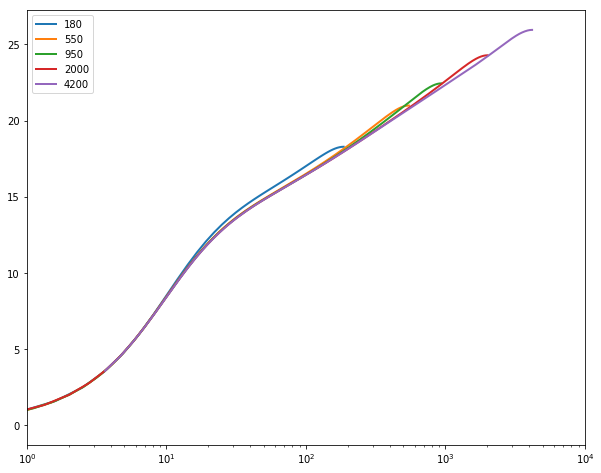

In [63]:
plot_low(dns_list, names_list=names_list)

In [117]:
def compare_dns_les(dns, les, plot_double=False):  
    plt.figure(figsize=(10,8))
    les_mean = les.groupby("Points:1").aggregate(np.mean)
    grid_les = len(les_mean) // 2 
    plt.plot(les_mean['y_plus'].iloc[:grid_les],les_mean['u_plus'].iloc[:grid_les],label="LES",linewidth=2, color="black")
    if plot_double:
        plt.plot(les_mean['y_plus'].iloc[grid_les:],les_mean['u_plus'].iloc[grid_les:],label="LES_2",linewidth=2, color="red")
    for idx, data in enumerate(dns):
        means_dns = pd.DataFrame(data)
        means_dns.columns = ["y_plus","u_plus"]
        plt.plot(means_dns['y_plus'],means_dns['u_plus'],label=f"DNS_{idx}",linewidth=2,)
    plt.xscale("log")
    plt.xlim(1,1000)
    plt.xticks((1,10,100,1000))
    plt.legend()

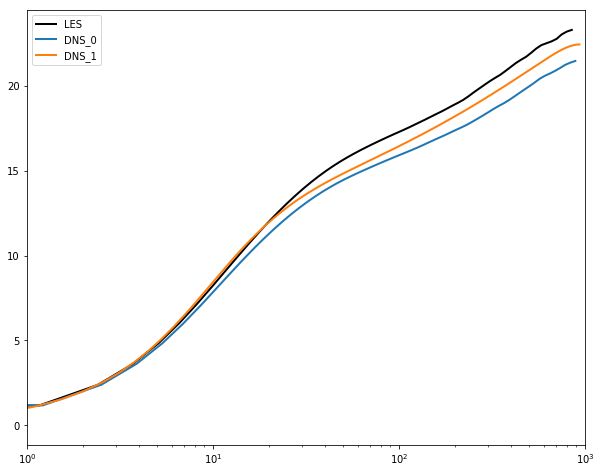

In [120]:
compare_dns_les([les_1000_2,dns_950],les_1000)

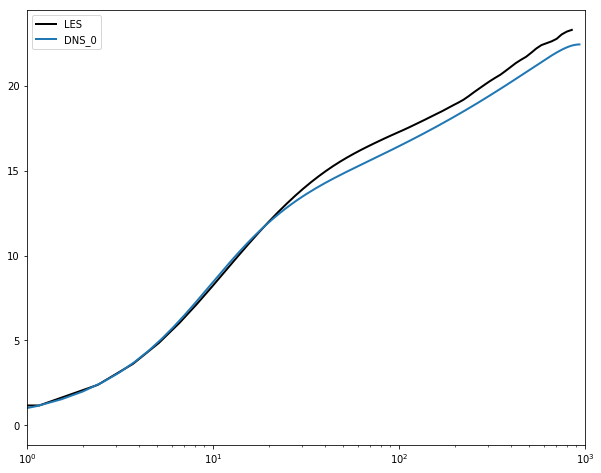

In [132]:
compare_dns_les([dns_950], les_1000)

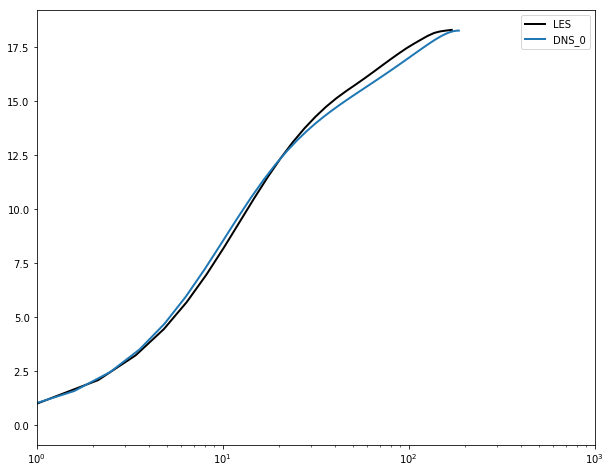

In [134]:
compare_dns_les([dns_180], les_180, plot_double=False)

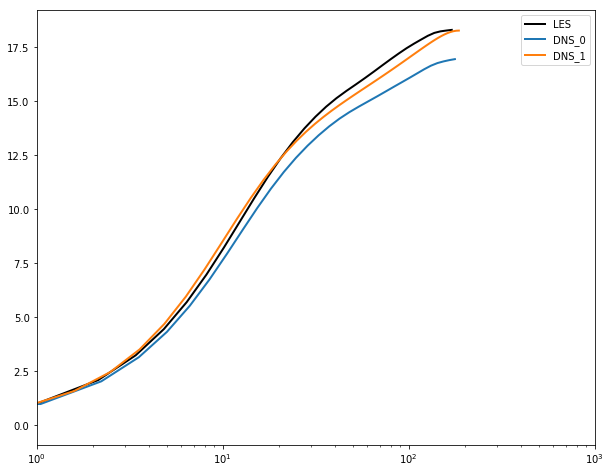

In [124]:
compare_dns_les([les_180_2,dns_180],les_180)

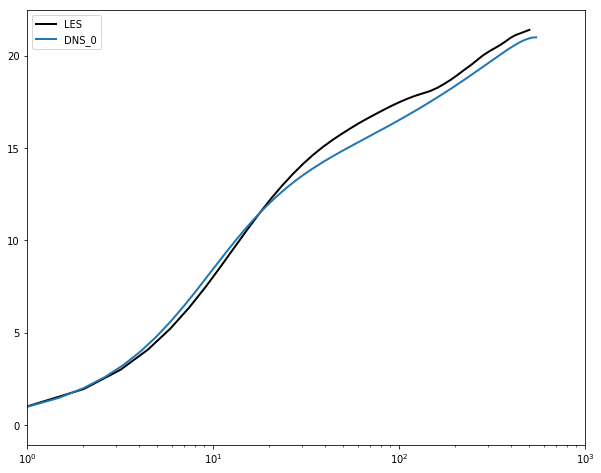

In [135]:
compare_dns_les([dns_550], les_550)

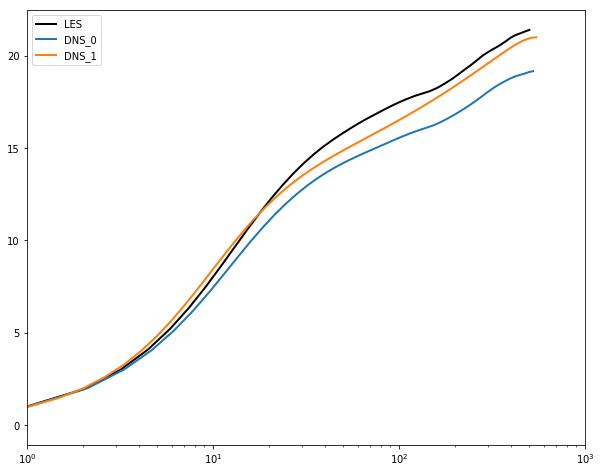

In [128]:
compare_dns_les([les_550_2,dns_550],les_550)